In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [51]:
import joblib 

In [31]:
digits = datasets.load_digits()
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [32]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
i = 

In [25]:
def plotMultiDigits(n):
    fig = plt.figure(figsize=(15,15))
    rows = n//4
    cols = 4
    
    for idx in range(n):
        plt.subplot(rows, cols, idx+1)
        plt.imshow(digits.images[idx])
        plt.title(digits.target[idx])
        plt.axis("off")
        
    plt.show()

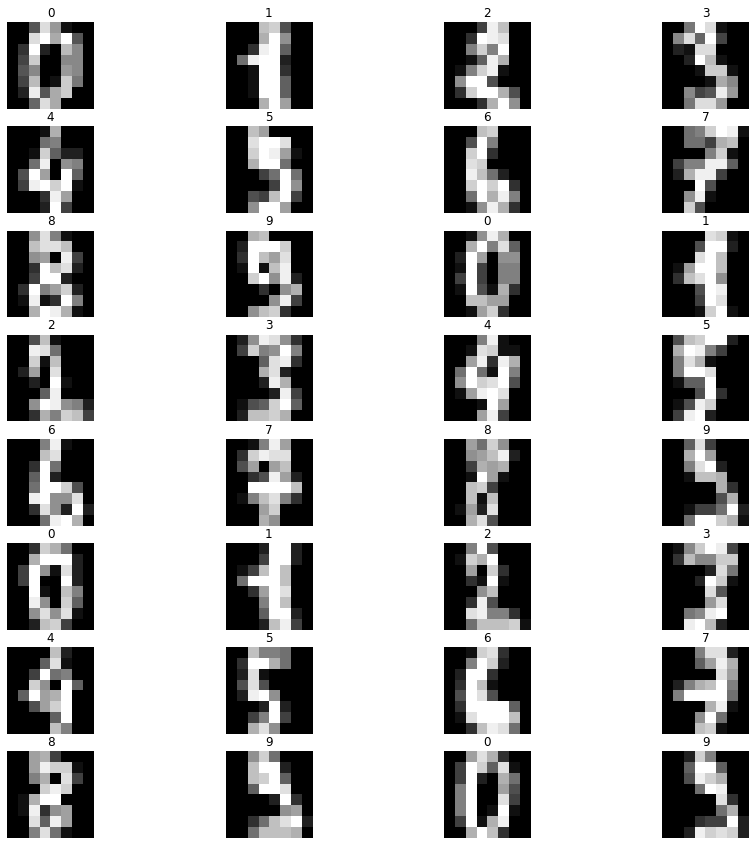

In [26]:
plotMultiDigits(32)

In [43]:
n_samples = len(digits.images)
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,
                                    digits.target, test_size=0.2, shuffle=True)


In [44]:
print(X_train.shape, X_test.shape,  Y_train.shape, Y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


## SVM

In [45]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, Y_train)


SVC(gamma=0.001)

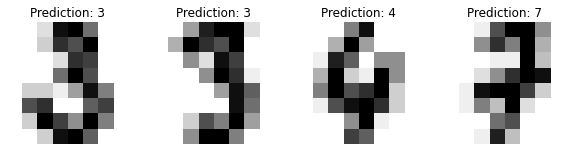

In [47]:
# plotting the predictions
predicted = clf.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [49]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(Y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        36
           3       1.00      0.92      0.96        38
           4       1.00      1.00      1.00        31
           5       0.98      1.00      0.99        41
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        42
           8       0.97      0.97      0.97        34
           9       1.00      1.00      1.00        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




In [52]:
#saving the model
joblib.dump(clf, 'svmFinalModel.pkl')

['svmFinalModel.pkl']

In [53]:
X_test.shape

(360, 64)

In [54]:
predicted.shape

(360,)

In [55]:
predicted

array([3, 3, 4, 7, 8, 6, 1, 4, 5, 0, 9, 7, 4, 7, 8, 3, 7, 5, 0, 1, 3, 6,
       4, 5, 4, 0, 7, 6, 2, 2, 3, 1, 5, 3, 8, 5, 8, 6, 5, 7, 8, 5, 8, 7,
       1, 1, 8, 4, 8, 9, 7, 2, 6, 3, 8, 9, 4, 3, 7, 3, 4, 5, 6, 4, 7, 6,
       7, 9, 1, 3, 0, 5, 6, 5, 2, 0, 1, 4, 8, 0, 4, 0, 1, 7, 4, 4, 0, 7,
       9, 6, 3, 7, 2, 0, 0, 9, 8, 4, 4, 9, 6, 7, 2, 9, 5, 5, 9, 2, 8, 0,
       3, 5, 5, 6, 2, 5, 4, 2, 5, 0, 7, 8, 0, 3, 0, 2, 9, 0, 2, 9, 6, 5,
       3, 9, 4, 8, 1, 8, 1, 9, 6, 5, 1, 3, 1, 8, 9, 8, 3, 2, 1, 8, 2, 5,
       9, 9, 9, 9, 7, 2, 9, 7, 5, 5, 2, 4, 2, 6, 2, 2, 7, 9, 5, 3, 8, 1,
       3, 3, 9, 5, 5, 7, 2, 8, 6, 9, 8, 3, 6, 8, 3, 5, 1, 0, 9, 6, 0, 2,
       0, 1, 6, 8, 0, 6, 6, 8, 7, 3, 7, 4, 2, 6, 5, 5, 4, 6, 5, 9, 1, 5,
       0, 4, 7, 1, 5, 4, 1, 7, 0, 1, 2, 0, 4, 0, 8, 0, 5, 1, 8, 1, 5, 6,
       7, 3, 8, 1, 8, 0, 7, 9, 3, 3, 4, 9, 3, 2, 2, 5, 7, 3, 2, 4, 0, 1,
       7, 2, 7, 6, 7, 3, 2, 5, 2, 4, 7, 9, 6, 9, 0, 7, 8, 7, 3, 2, 0, 7,
       4, 8, 2, 7, 5, 6, 1, 7, 6, 7, 3, 1, 7, 7, 2,

In [62]:
import cv2
i = cv2.resize(digits.images[333],(28,28))
cv2.imshow('im', i)
cv2.waitKey(0)
cv2.destroyAllWindows()